This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [ ]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

## CREATE GRAD-SHAFRANOV PROBLEM
Equilibrium = GradShafranovSolver()

## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = False
Equilibrium.GhostStabilization = True
Equilibrium.PARALLEL = False

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_boundaries = True
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_quadratures = False
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.dim = 2                    # PROBLEM SPATIAL DIMENSION
Equilibrium.QuadratureOrder2D = 8      # ORDER OF SURFACE NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.QuadratureOrder1D = 5      # ORDER OF LENGTH NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.ext_maxiter = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3           # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4           # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.tol_saddle = 0.1           # TOLERANCE FOR DISTANCE BETWEEN CONSECUTIVE ITERATION SADDLE POINTS (LETS PLASMA REGION CHANGE)
Equilibrium.beta = 1.0e6               # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.Nconstrainedges = -1       # NUMBER OF PLAMA BOUNDARY APPROXIMATION EDGES ON WHICH CONSTRAIN BC
Equilibrium.zeta = 1.0e-2              # GHOST PENALTY PARAMETER
Equilibrium.R0_axis = 6.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 1.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0            # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = -3.5           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50          # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6          # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE


Equilibrium.InitialiseParameters()
Equilibrium.InitialisePickleLists()

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY


# SELECT COMPUTATIONAL MESH (OVAL MESHES)

In [ ]:
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-INTERMEDIATE-ITER'
#MESH = 'TRI03-FINE-ITER'
#MESH = 'TRI03-SUPERFINE-ITER'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-INTERMEDIATE-ITER'
#MESH = 'TRI06-FINE-ITER'
#MESH = 'TRI06-SUPERFINE-ITER'
MESH = 'TRI06-MEGAFINE-ITER'

###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI10-FINE-ITER'
#MESH = 'TRI10-SUPERFINE-ITER'

Equilibrium.MESH = Mesh(MESH)

Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI06-MEGAFINE-ITER
READ MESH FILES...Done!


Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI03-FINE-ITFW
READ MESH FILES...Done!


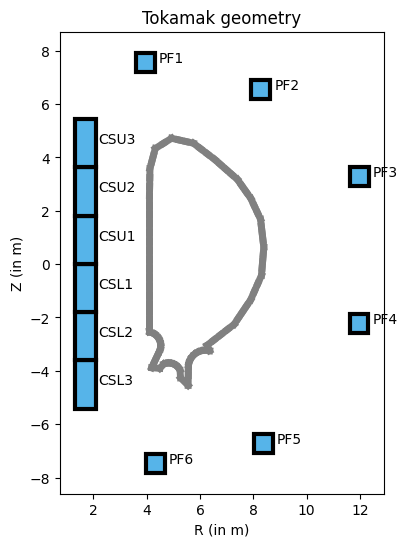

In [15]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS WITH QUADRILATERAL COILS
# COILS
coil1 = QuadrilateralCoil(name = 'PF1',
                          Itotal = 5.73e6,
                          Xcenter = np.array([3.9431,7.5741]),
                          Area = 0.5)
coil2 = QuadrilateralCoil(name = 'PF2',
                          Itotal= -2.88e6,
                          Xcenter = np.array([8.2851,6.5398]),
                          Area = 0.5)
coil3 = QuadrilateralCoil(name = 'PF3',
                          Itotal= -5.81e6,
                          Xcenter = np.array([11.9919,3.2752]),
                          Area = 0.5)
coil4 = QuadrilateralCoil(name = 'PF4',
                          Itotal= -4.78e6,
                          Xcenter = np.array([11.9630,-2.2336]),
                          Area = 0.5)
coil5 = QuadrilateralCoil(name = 'PF5',
                          Itotal= -7.81e6,
                          Xcenter = np.array([ 8.3908,-6.7269]),
                          Area = 0.5)
coil6 = QuadrilateralCoil(name = 'PF6',
                          Itotal= 16.94e6,
                          Xcenter = np.array([4.3340, -7.4665]),
                          Area = 0.5)
   
# QUADRILATERAL CROSS-SECTION SOLENOIDS
solewidth = 0.8
solenoid1 = QuadrilateralCoil(name = 'CSL3',
                              Itotal = 5.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -3.6067],
                                                    [1.696-solewidth/2, -3.6067]]))
solenoid2 = QuadrilateralCoil(name = 'CSL2',
                              Itotal = -10.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -1.7983],
                                                    [1.696-solewidth/2, -1.7983]]))
solenoid3 = QuadrilateralCoil(name = 'CSL1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, -1.798],
                                                    [1.696+solewidth/2, -1.798],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696-solewidth/2, 0.0]]))
solenoid4 = QuadrilateralCoil(name = 'CSU1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696-solewidth/2, 1.8183]]))
solenoid5 = QuadrilateralCoil(name = 'CSU2',
                              Itotal = -4.05e6,
                              Xvertices = np.array([[1.696-solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696-solewidth/2, 3.6267]]))
solenoid6 = QuadrilateralCoil(name = 'CSU3',
                              Itotal = -4.82e6,
                              Xvertices = np.array([[1.696-solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 5.435],
                                                    [1.696-solewidth/2, 5.435]]))

magnets = [coil1, coil2, coil3, coil4, coil5, coil6,
           solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

# TOKAMAK WALL MESH
TOKmesh = Mesh('TRI03-FINE-ITFW')
Equilibrium.TOKAMAK = Tokamak(WALL_MESH = TOKmesh,
                              MAGNETS = magnets)

Equilibrium.TOKAMAK.Plot()

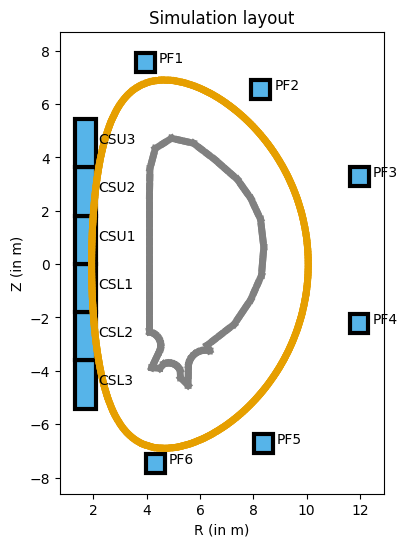

In [16]:
Equilibrium.PlotLayout(plotmesh=False)

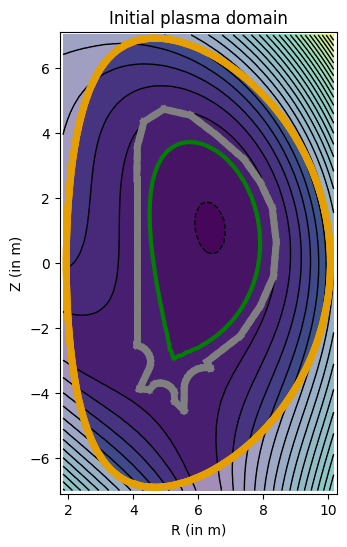

In [17]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

import numpy as np

X_SADDLE = np.array([5.2, -2.9])        # ACTIVE SADDLE POINT  
X_RIGHT = np.array([7.9, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.5, 1.5])           # POINT ON LEFT
X_TOP = np.array([5.9, 3.7])            # POINT ON TOP

# PLASMA BOUNDARY PARAMETRISED cubicHam HAMILTONIAN 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'cubicHam',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

Equilibrium.initialPHI.Plot()

In [ ]:
Equilibrium.DomainDiscretisation(INITIALISATION = True)

INITIALISE ELEMENTAL DISCRETISATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.004398826816069766 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.1005993443142157 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·39.761690568342594
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Warning:  Element 16428, subelem 0: surface integration quadrature is not accurate.
Done!
Done!


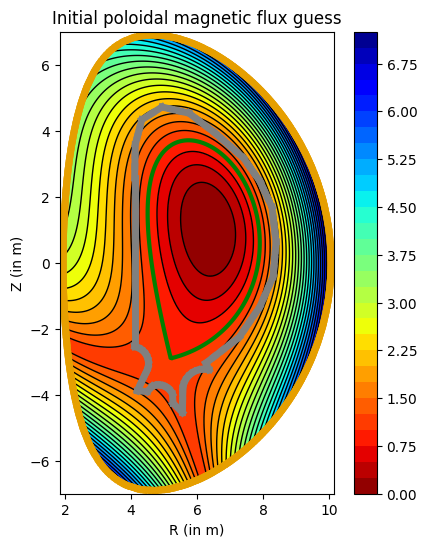

In [19]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

X_SADDLE = np.array([5.2, -2.9])        # ACTIVE SADDLE POINT  
X_RIGHT = np.array([7.9, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.5, 1.5])           # POINT ON LEFT
X_TOP = np.array([5.9, 3.7])            # POINT ON TOP

X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'cubicHam',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

"""
def PSI0(X):
    return
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

Equilibrium.initialPSI.Plot()

In [20]:
Equilibrium.InitialisePSI()

INITIALISE PSI...
     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
     -> ASSIGN INITIAL PLASMA BOUNDARY VALUES...Done!
Done!


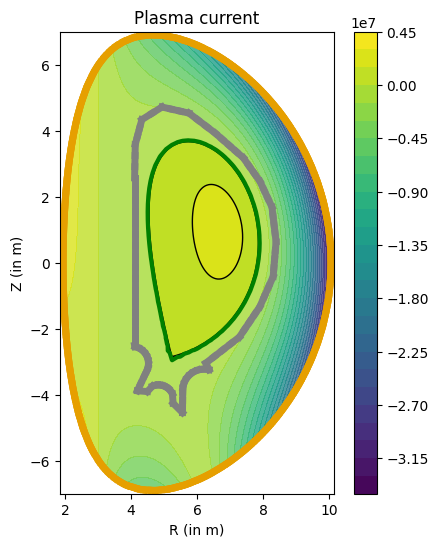

In [21]:
### DEFINE PLASMA CURRENT MODEL

# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Equilibrium.mu0*(R0**2)*q0*kappa)

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSI_INDEPENDENT = False)
"""

Equilibrium.IntegratePlasmaDomain(Equilibrium.PlasmaCurrent.Jphi)

Equilibrium.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE PSI_B...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...Done!
     -> ASSIGN INITIAL VACUUM VESSEL BOUNDARY VALUES...Done!
Done!
WRITE INITIAL SIMULATION DATA...Done!


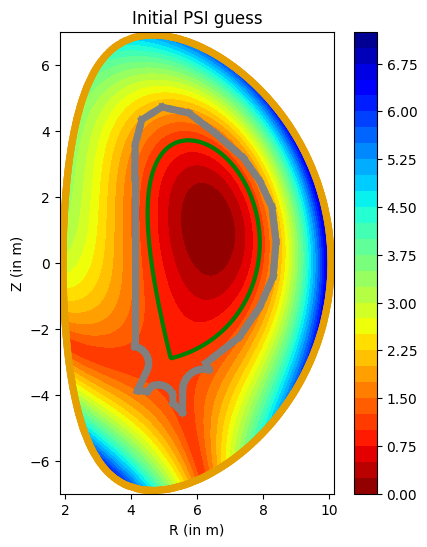

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  14999999.999999715
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.45131697 0.81787945]  (ELEMENT  10277 ) WITH VALUE PSI_0 =  -11.609990532917783
SADDLE POINT AT  [ 5.09170629 -3.29903198]  (ELEMENT  7121 ) WITH VALUE PSI_X =  -0.3886740560004732


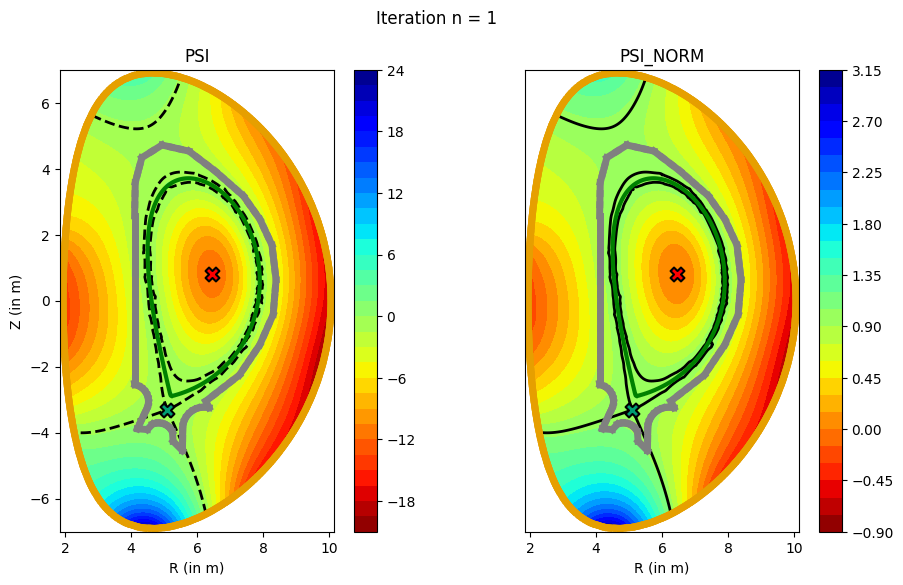

Internal iteration =  1 , PSI_NORM residu =  2.940444416483596
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  15000000.00000022
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.48010307 0.73961013]  (ELEMENT  17533 ) WITH VALUE PSI_0 =  -14.036030346267598
SADDLE POINT AT  [ 5.08949147 -3.35889643]  (ELEMENT  7749 ) WITH VALUE PSI_X =  -0.008277482357270154


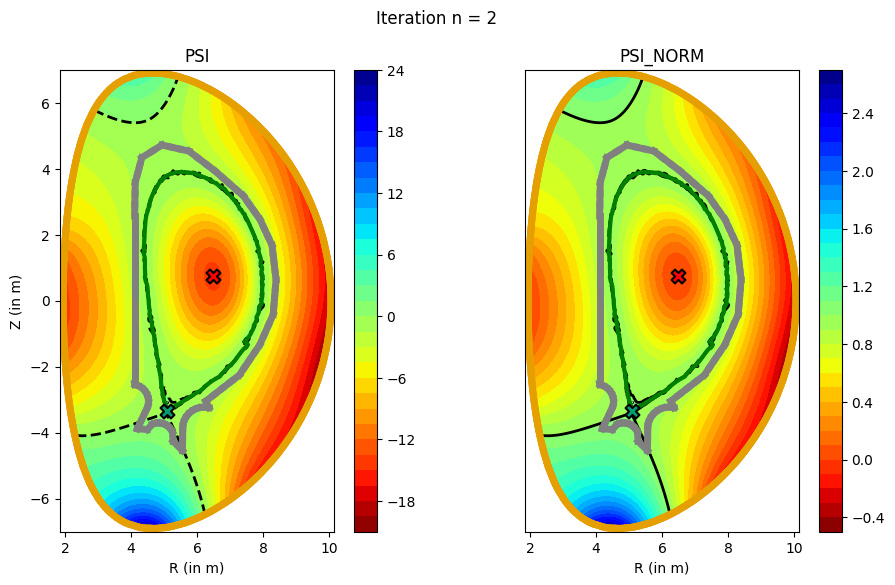

Internal iteration =  2 , PSI_NORM residu =  0.1418122096980107
 
Plasma region unchanged: distance between consecutive saddle points =  0.05990540667468146
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  15000000.0000001
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.49273594 0.70367013]  (ELEMENT  17513 ) WITH VALUE PSI_0 =  -13.10423507537039
SADDLE POINT AT  [ 5.09061082 -3.35799046]  (ELEMENT  7749 ) WITH VALUE PSI_X =  -0.008137152575995982


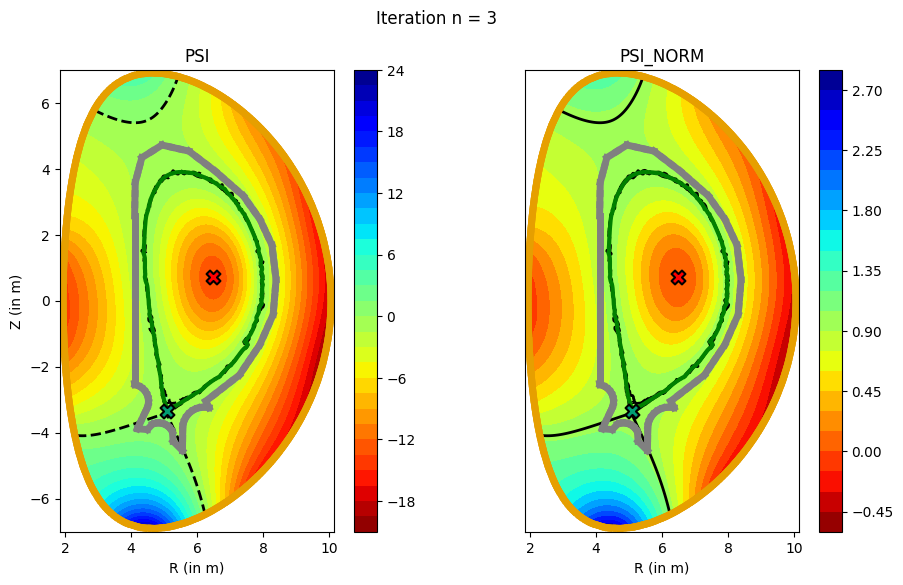

Internal iteration =  3 , PSI_NORM residu =  0.04249644552489586
 
Plasma region unchanged: distance between consecutive saddle points =  0.05896865450523115
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  15000000.000000114
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.49684671 0.68580951]  (ELEMENT  17513 ) WITH VALUE PSI_0 =  -13.00276101439412
SADDLE POINT AT  [ 5.09074525 -3.35787511]  (ELEMENT  7749 ) WITH VALUE PSI_X =  -0.008118956746324213


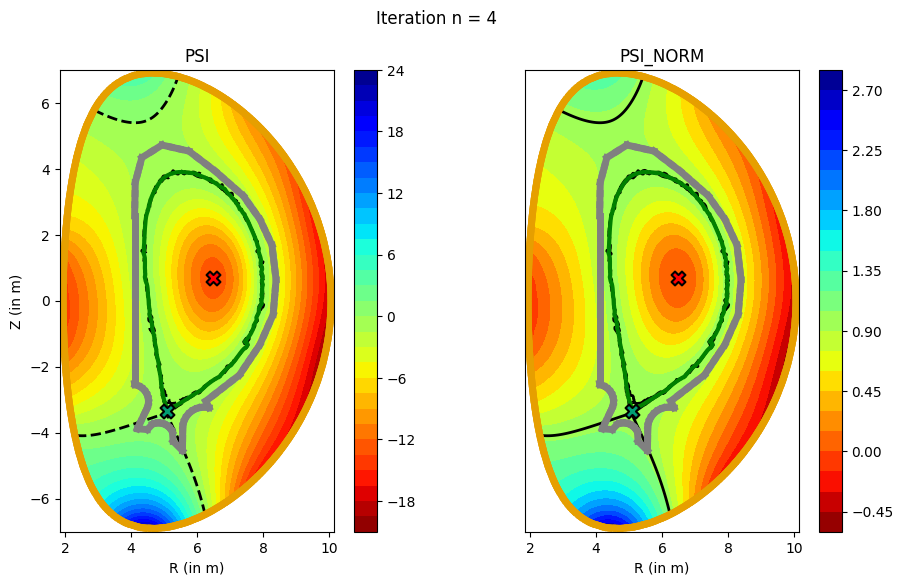

Internal iteration =  4 , PSI_NORM residu =  0.005378223525956921
 
Plasma region unchanged: distance between consecutive saddle points =  0.05885096898232311
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  15000000.000000266
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.49808544 0.67689545]  (ELEMENT  17511 ) WITH VALUE PSI_0 =  -12.982159186631943
SADDLE POINT AT  [ 5.09078848 -3.35783703]  (ELEMENT  7749 ) WITH VALUE PSI_X =  -0.008112910559009583


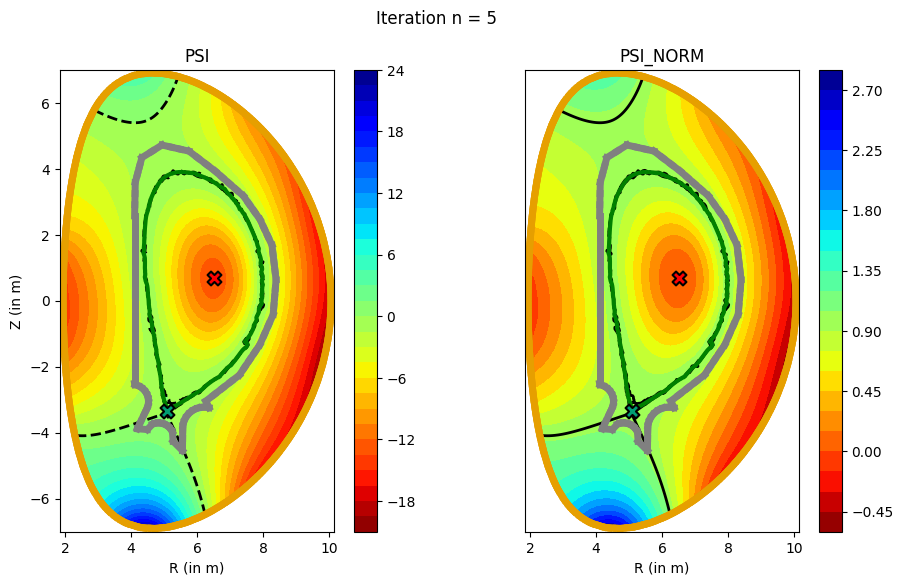

Internal iteration =  5 , PSI_NORM residu =  0.0014077244652098704
 
Plasma region unchanged: distance between consecutive saddle points =  0.05881221189041828
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  14999999.99999994
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.49847632 0.67246472]  (ELEMENT  17511 ) WITH VALUE PSI_0 =  -12.976648836606834
SADDLE POINT AT  [ 5.09080684 -3.35782073]  (ELEMENT  7749 ) WITH VALUE PSI_X =  -0.008110312273841278


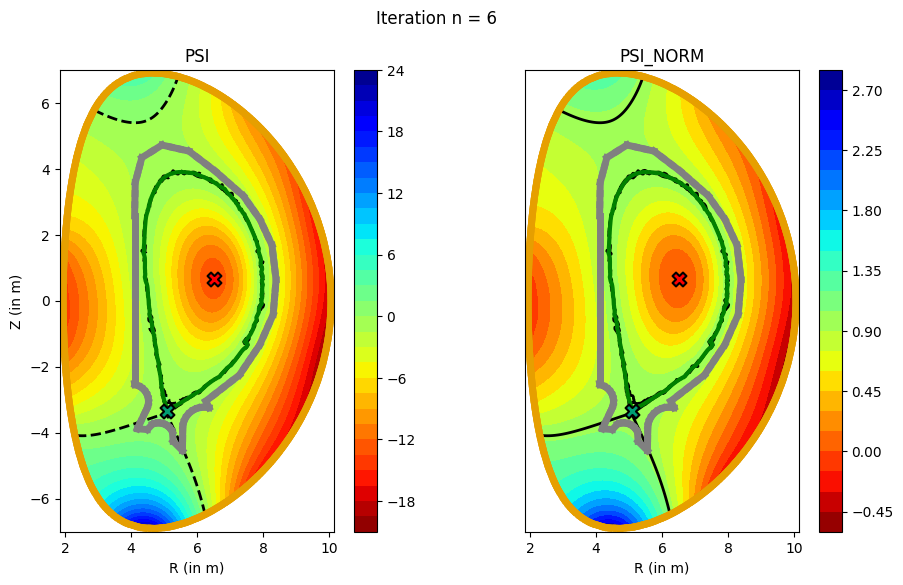

Internal iteration =  6 , PSI_NORM residu =  0.0005457414393783794
 
Plasma region unchanged: distance between consecutive saddle points =  0.058795627386156166
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  14999999.99999996
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.49861295 0.67027093]  (ELEMENT  17511 ) WITH VALUE PSI_0 =  -12.974876727161261
SADDLE POINT AT  [ 5.09081533 -3.35781316]  (ELEMENT  7749 ) WITH VALUE PSI_X =  -0.008109103971053864


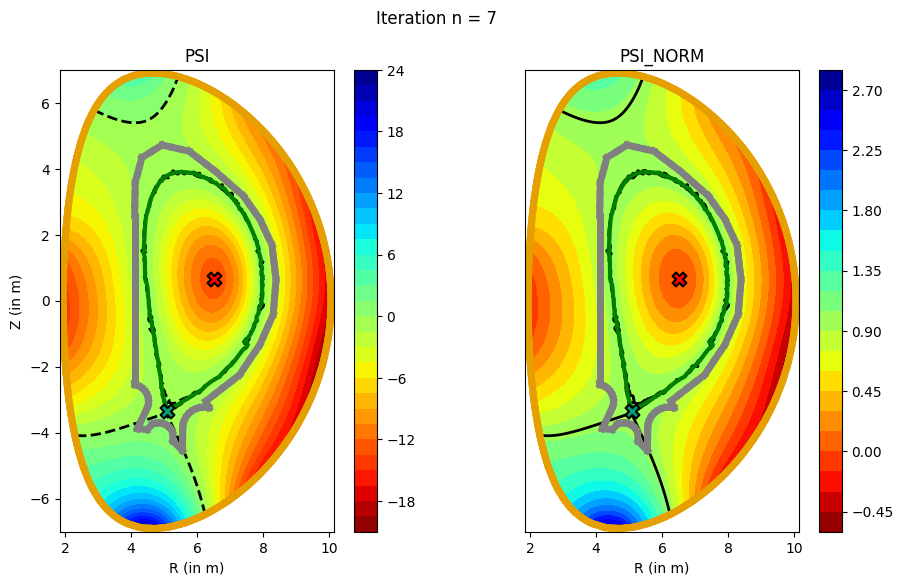

Internal iteration =  7 , PSI_NORM residu =  0.00024774601628137086
 
Plasma region unchanged: distance between consecutive saddle points =  0.05878793095764555
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  14999999.999999972
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.49866648 0.66918761]  (ELEMENT  17511 ) WITH VALUE PSI_0 =  -12.974227516427835
SADDLE POINT AT  [ 5.09081938 -3.35780954]  (ELEMENT  7749 ) WITH VALUE PSI_X =  -0.00810852532232938


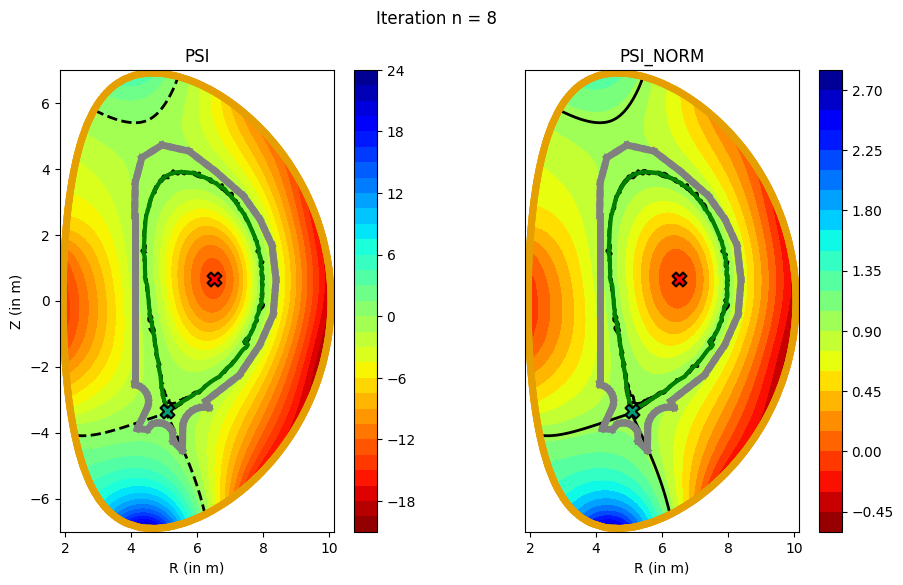

Internal iteration =  8 , PSI_NORM residu =  0.00011828254915049112
 
Plasma region unchanged: distance between consecutive saddle points =  0.058784249026917555
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  15000000.000000058
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.49868953 0.66865353]  (ELEMENT  17511 ) WITH VALUE PSI_0 =  -12.973966649768736
SADDLE POINT AT  [ 5.09082134 -3.35780779]  (ELEMENT  7749 ) WITH VALUE PSI_X =  -0.008108244684657928


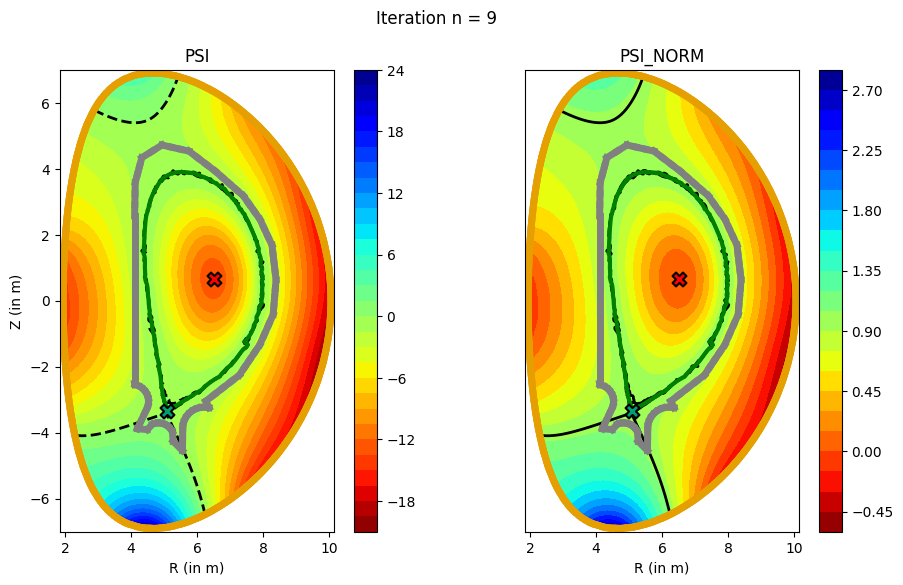

Internal iteration =  9 , PSI_NORM residu =  5.743921002136716e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.05878246430498553
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.02473614256602428
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  15000000.000000162
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.49870847 0.66838138]  (ELEMENT  17511 ) WITH VALUE PSI_0 =  -12.97397614851354
SADDLE POINT AT  [ 5.12075601 -3.31160631]  (ELEMENT  7121 ) WITH VALUE PSI_X =  -0.00016302766220261267


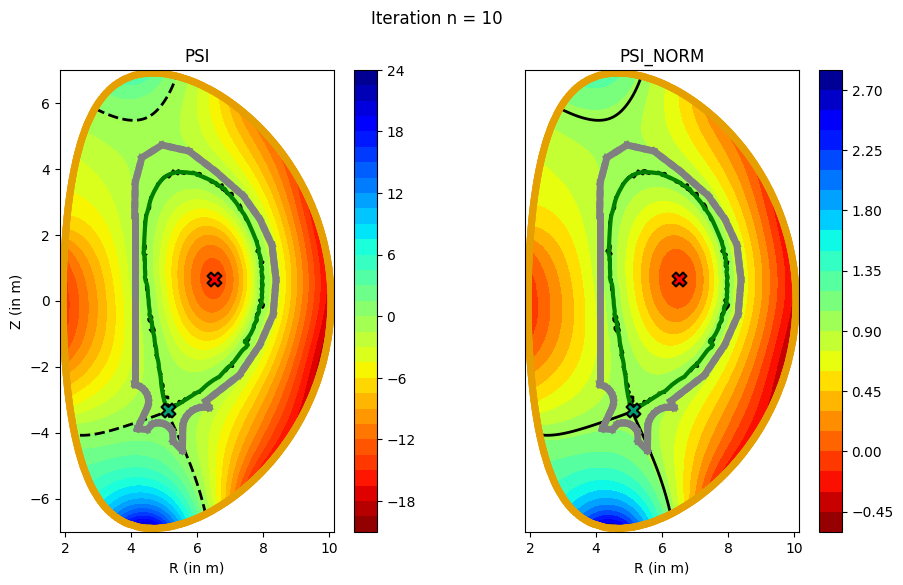

Internal iteration =  1 , PSI_NORM residu =  0.016253944755550087
 
Plasma region unchanged: distance between consecutive saddle points =  0.031654382889023246
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Total current =  15000000.000000048
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.49870588 0.66824413]  (ELEMENT  17511 ) WITH VALUE PSI_0 =  -12.96462522392585
SADDLE POINT AT  [ 5.1208457  -3.31149604]  (ELEMENT  7121 ) WITH VALUE PSI_X =  -0.00016055952316918788


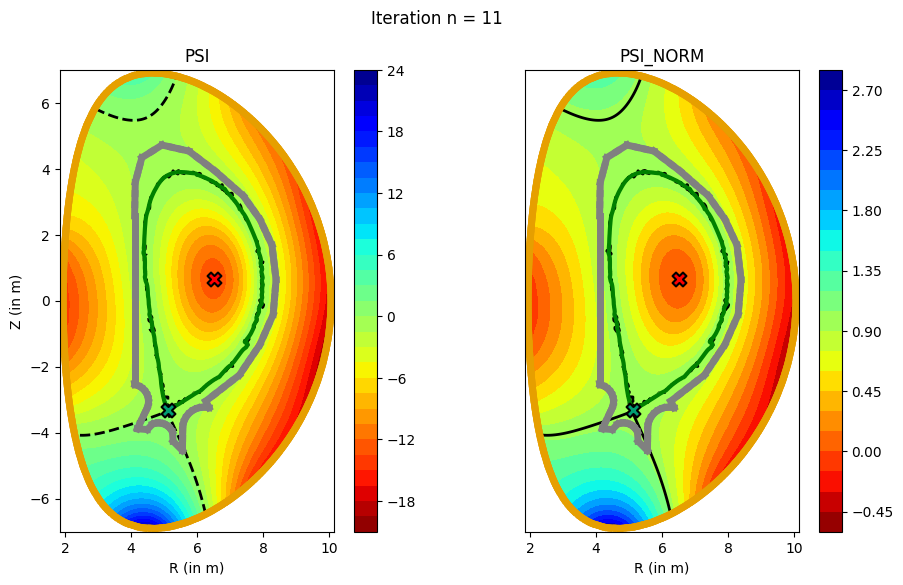

Internal iteration =  2 , PSI_NORM residu =  0.0004596013308945319
 
Plasma region unchanged: distance between consecutive saddle points =  0.03169319292737224
 
OUTER ITERATION = 2 , INNER ITERATION = 3
     Total current =  14999999.999999838
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.49869985 0.66817375]  (ELEMENT  17511 ) WITH VALUE PSI_0 =  -12.963154432058595
SADDLE POINT AT  [ 5.12085085 -3.31148963]  (ELEMENT  7121 ) WITH VALUE PSI_X =  -0.00016041917329553715


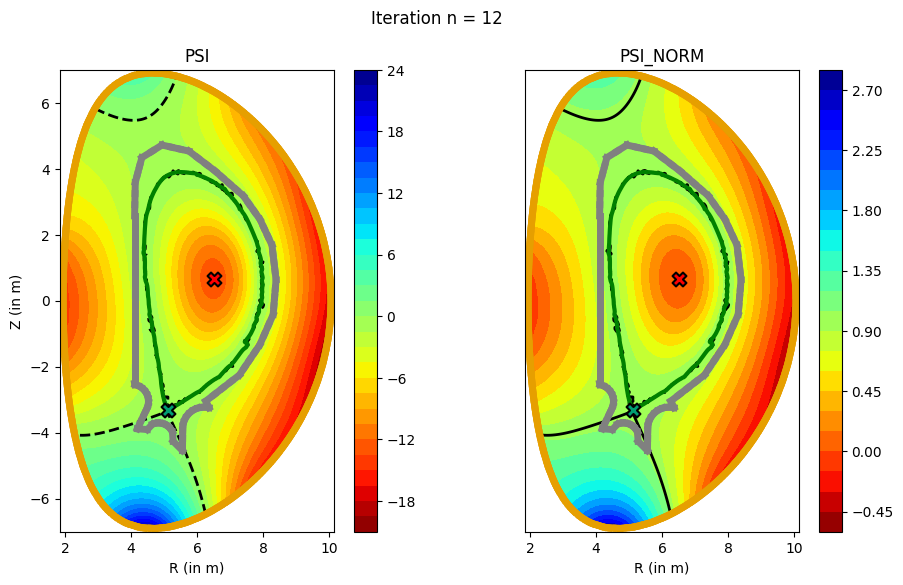

Internal iteration =  3 , PSI_NORM residu =  7.401865051880441e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.031695403953449254
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  2 , PSI_B residu =  9.148192064576583e-05
 
SOLUTION CONVERGED


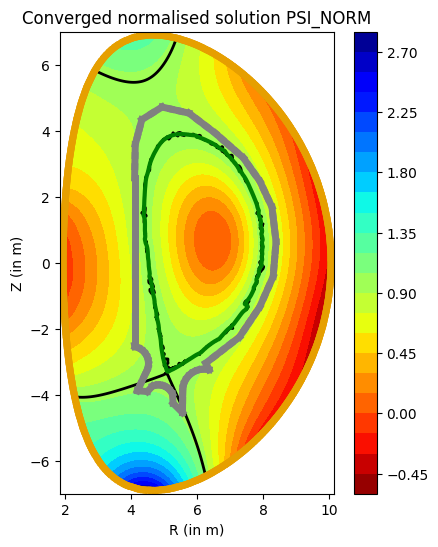

In [22]:
## NAME SIMULATION CASE 
CASE = "TS-FREE-APEC-ITER-SHAPEDCOILS"

## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)